In [2]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import requests
import numpy as np
import os
from datetime import datetime
import sys  
%matplotlib inline

In [3]:
# make api call to flickr
# for some reason, flickr key isn't found (KeyError)

flickr_api_url = "https://www.flickr.com/services/rest/?method=flickr.photos.search&api_key=f8ac40eee0aacfa3be6dee0cbac63930" +\
            "&tags=sunset" +\
            "&text=sunset%20landscape" +\
            "&content_type=1" +\
            "&has_geo=1" +\
            "&sort=interestingness-desc" +\
            "&extras=date_taken%2C+geo%2C+url_o" +\
            "&format=json&nojsoncallback=1"
            # "&is_getty=1" +\             

flickr_res = requests.get(flickr_api_url)

In [4]:
# make api call to visualcrossing
if(flickr_res.status_code < 200 or flickr_res.status_code >= 300): 
    print('Unsuccessful request. Error code: {}'.format(flickr_res.status_code))
    sys.exit()
flickr_res = flickr_res.json()
aPhoto = flickr_res['photos']['photo'][0]
VISUALCROSSING_API_KEY = os.environ["VISUALCROSSING_API_KEY"]

format_string = "%Y-%m-%d %H:%M:%S"
dateTaken = datetime.strptime(aPhoto["datetaken"], format_string)
# print(type(aPhoto))
# print(aPhoto)
# print(aPhoto["latitude"])
# print(aPhoto["longitude"])
# print(aPhoto["datetaken"])
# print(str(dateTaken.date()))
# print(str(dateTaken.time()))

visualcrossing_api_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" +\
                        aPhoto["latitude"] + "%2C%20" + aPhoto["longitude"] + "/" +\
                        str(dateTaken.date()) + "/" + str(dateTaken.date()) +\
                        "?unitGroup=us" +\
                        "&key=" + VISUALCROSSING_API_KEY +\
                        "&contentType=json"

weather_res = requests.get(visualcrossing_api_url)


Unsuccessful : 429


SystemExit: 

C:\Users\k3vnx\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 720x720 with 0 Axes>

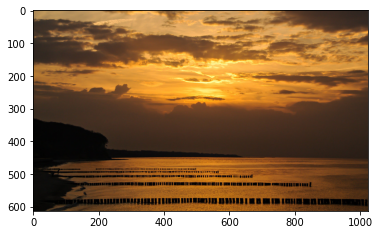

In [6]:
# display photo
aImgUrl = f'https://live.staticflickr.com/{aPhoto["server"]}/{aPhoto["id"]}_{aPhoto["secret"]}_b.jpg'
aFig = plt.figure(figsize=(10, 10))
aPic = iio.imread(aImgUrl)
fig = plt.figure()
plt.imshow(aPic)


In [ ]:
# write weather data of picture to database
if(weather_res.status_code < 200 or weather_res.status_code >= 300): 
    print('Unsuccessful request. Error code: {}'.format(weather_res.status_code))
    sys.exit()
weather_res = weather_res.json()

# nearest hour of sunset
nearest_hour = dateTaken.hour
print(nearest_hour)
if dateTaken.minute > 30:
    nearest_hour +=  1

# determine formatting for data
nearest_hour_data = weather_res["days"][0]["hours"][nearest_hour]
# print(nearest_hour_data)
print('Humidity : {}'.format(nearest_hour_data['humidity']))
print('Cloud Cover : {}'.format(nearest_hour_data['cloudcover']))
print('Sunset Time : {}'.format(weather_res['days'][0]['sunset']))
print(nearest_hour)


In [ ]:
# look at later for batch processing
'''
fig = plt.figure(figsize=(10, 5))
rows = 2
cols = 5

for i in range(10):
    # get and load pic
    photo = res['photos']['photo'][i]
    print(photo['title'])
    # print(photo["url_o"])
    imgUrl = f'https://live.staticflickr.com/{photo["server"]}/{photo["id"]}_{photo["secret"]}_b.jpg'
    aPic = iio.imread(imgUrl)

    # add aPic to fig
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(pic) 
'''

In [ ]:
np.random.seed(1)
print('Shape of the image : {}'.format(aPic[:,:,0].shape)) 
# print('Type of the image : ' , type(pic))
# print('Shape of the image : {}'.format(pic.shape)) 
# print('Image Hight {}'.format(pic.shape[0])) 
# print('Image Width {}'.format(pic.shape[1])) 
# print('Dimension of Image {}'.format(pic.ndim))

# get random selection of pixels from image to analyze
indices = np.random.choice(aPic.shape[1]*aPic.shape[0], replace=False, size=int(aPic.shape[1]*aPic.shape[0]*1))
print(indices)
print(indices.shape)
print(type(indices.shape))
sampleIndices = np.unravel_index(indices, aPic[:,:,0].shape)
print(sampleIndices[0])
print(sampleIndices[1])
print(type(sampleIndices[1]))
samplePic = aPic[sampleIndices[0], sampleIndices[1], :]
print(samplePic)
print(samplePic.shape)
plt.imshow(samplePic)